1. 지역별 총인구수 Top5

In [ ]:
import pandas as pd

# 인구현황 불러오기
data = pd.read_csv('../data/인구현황.csv')
pop_df = data.loc[data['행정기관'] != '전국', ['행정기관','총인구수']].sort_values(by='총인구수',ascending=False).copy()
pop_df.head() # Top 5 = head()

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


1-1. 지역별 총인구수 plot

Text(0.5, 1.0, '지역별 총인구수')

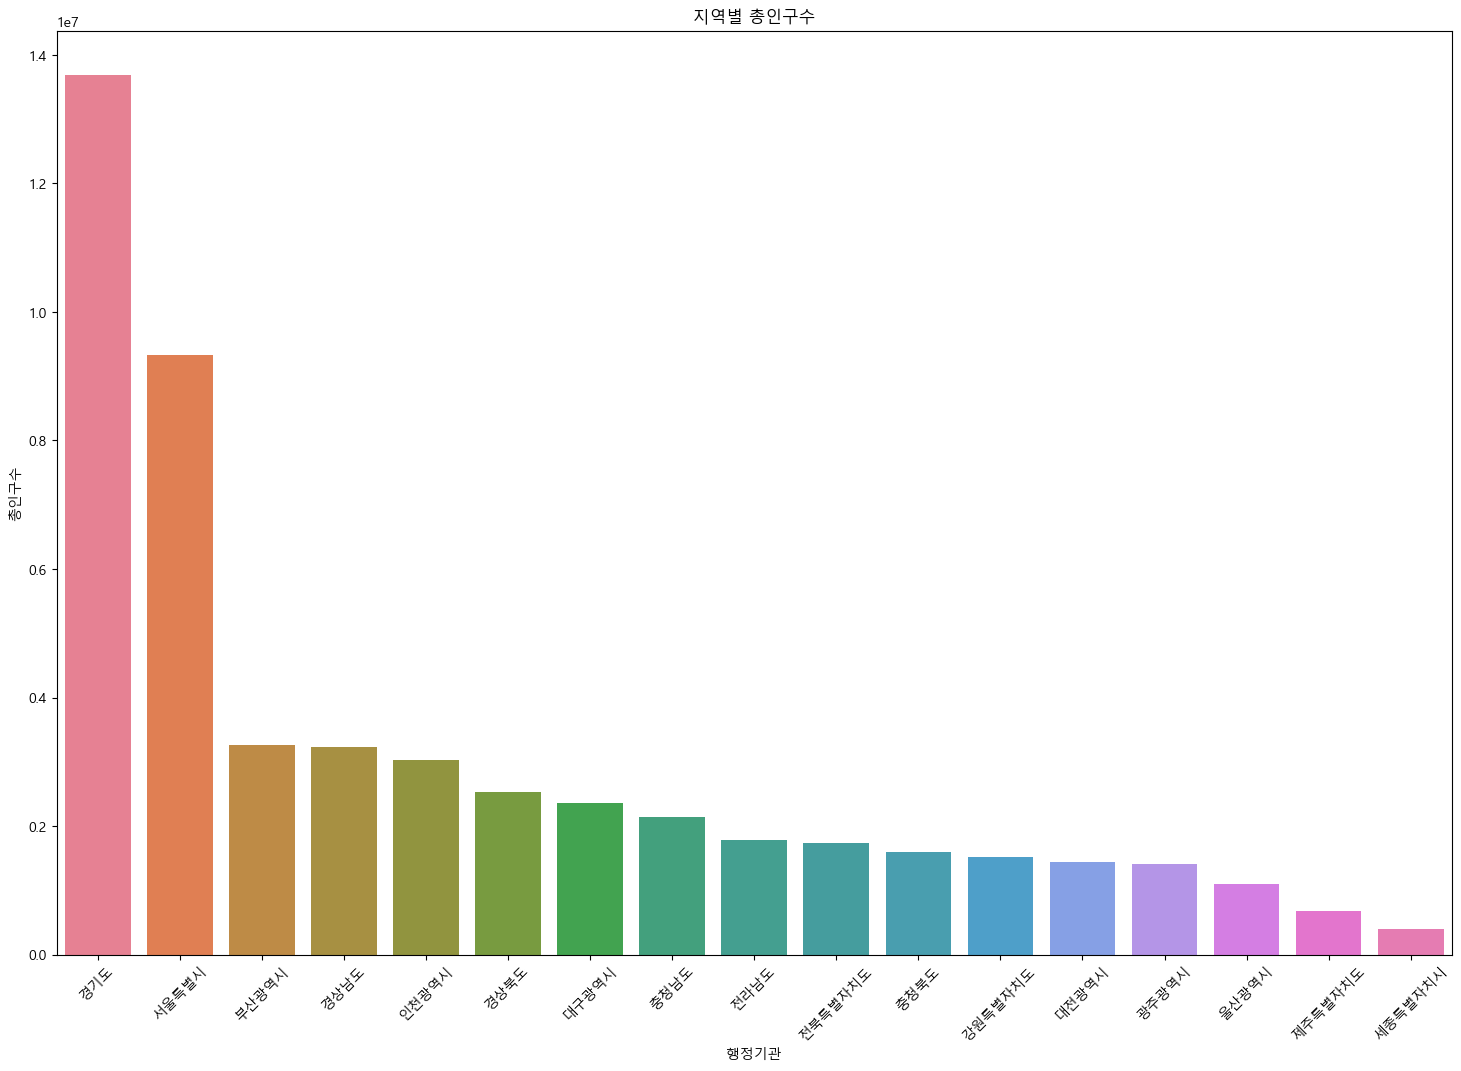

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = 'C:\\Windows\\Fonts\\malgunbd.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

figure,(axes1) = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,12)
plt.xticks(rotation=45)

pop_plot = sns.barplot(data=pop_df.sort_values(by='총인구수',ascending=False),x='행정기관',y='총인구수',ax=axes1, hue='행정기관')
pop_plot.set_title('지역별 총인구수')

2. 세대당 인구수 높은 지역 Top5

In [24]:
pph_df = data.loc[data['행정기관'] != '전국', ['행정기관','세대당 인구']].sort_values(by='세대당 인구',ascending=False).reset_index(drop=True).copy() # pph = population per house (세대별 인구수)
pph_df.head() # Top 5 = head()

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


2-1. 지역별 세대당 인구 Plot

Text(0.5, 1.0, '지역별 세대당 인구')

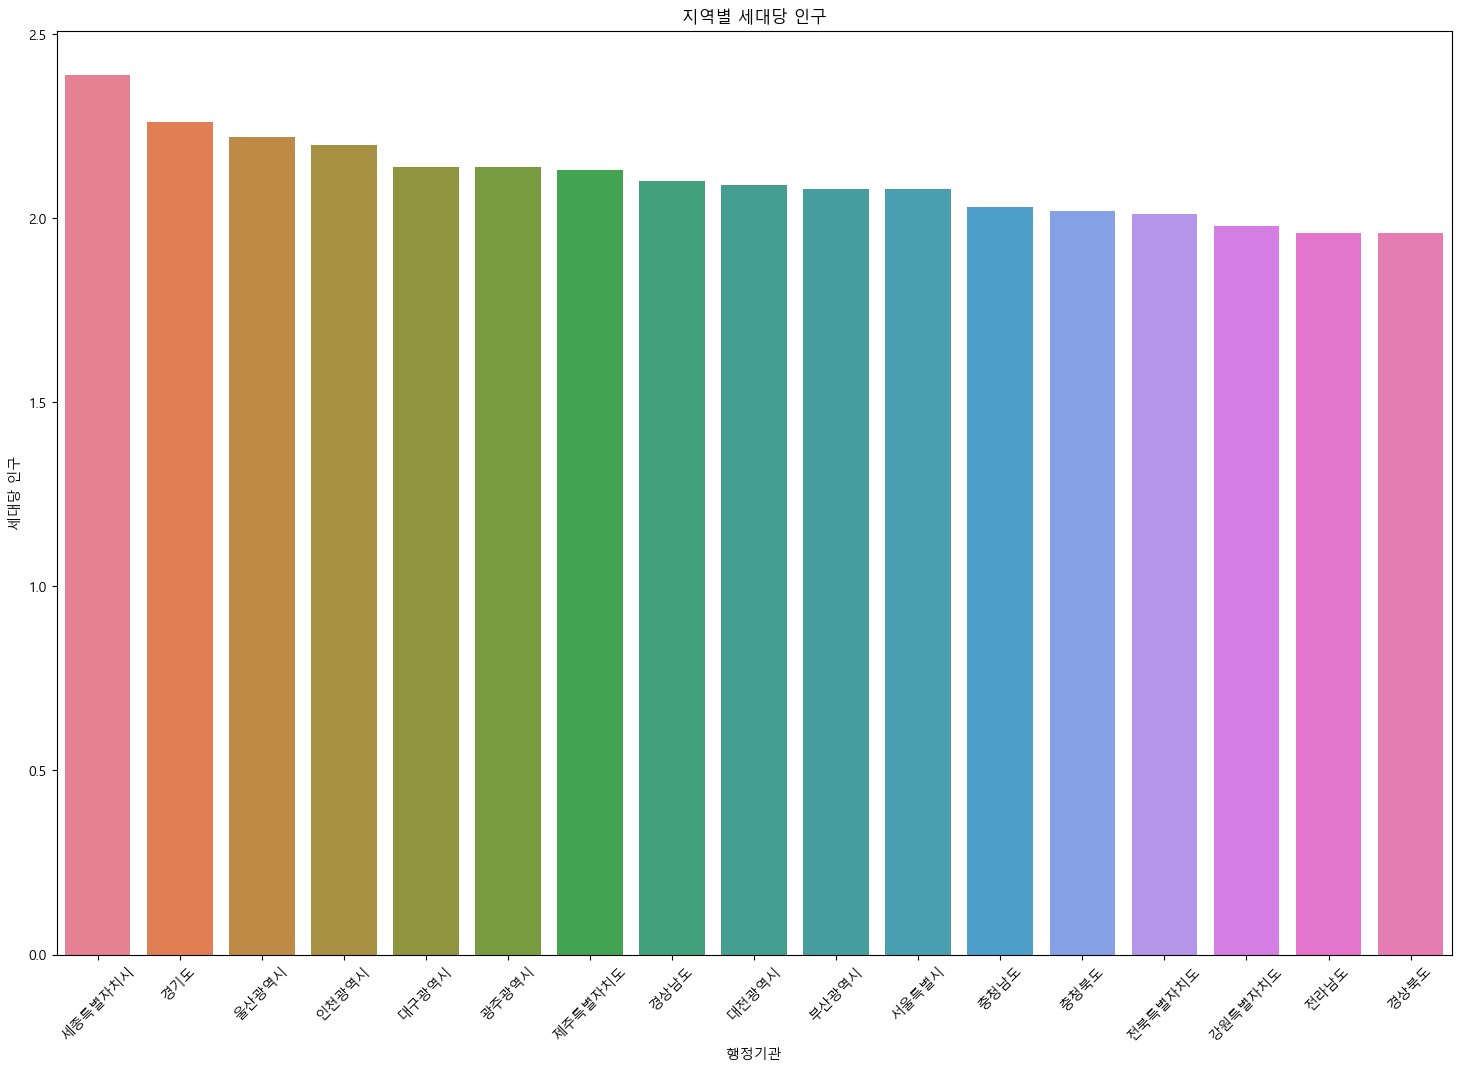

In [28]:
figure,(axes2) = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,12)
plt.xticks(rotation=45)

pph_plot = sns.barplot(data=pph_df.sort_values(by='세대당 인구',ascending=False),x='행정기관',y='세대당 인구',ax=axes2, hue='행정기관')
pph_plot.set_title('지역별 세대당 인구')

3. 남녀 비율 분석

In [30]:
ratio_df = data.loc[data['행정기관'] != '전국', ['행정기관','남여 비율']].sort_values(by='남여 비율',ascending=False).reset_index(drop=True).copy() # pph = population per house (세대별 인구수)
ratio_df # Top 5 = head()

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


3-1. 남녀 비율 분석 Plot


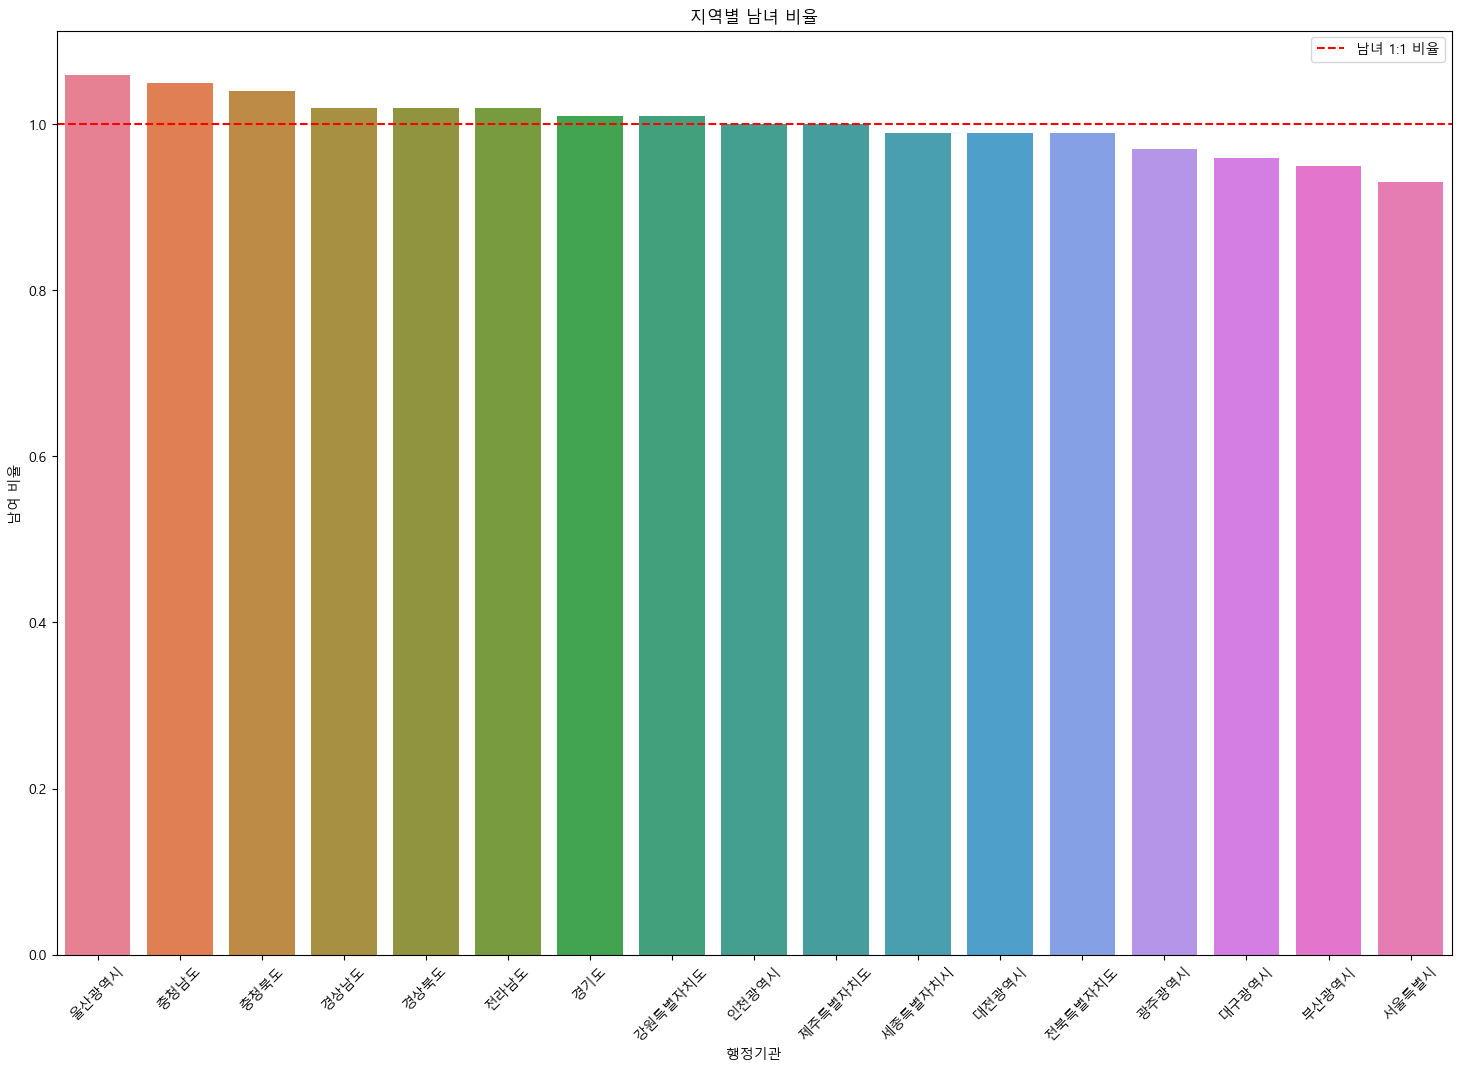

In [35]:
figure,(axes3) = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,12)
plt.xticks(rotation=45)

rat_plot = sns.barplot(data=ratio_df.sort_values(by='남여 비율',ascending=False),x='행정기관',y='남여 비율',ax=axes3, hue='행정기관')
rat_plot.set_title('지역별 남녀 비율')
plt.axhline(1.0, color='red', linestyle='--', label='남녀 1:1 비율')
plt.legend()

4. 남자초과 / 여자초과 분석

In [38]:
ratio2_df = data.loc[data['행정기관'] != '전국', ['행정기관','남여 비율']].copy()

ratio2_df['남초여초'] = ratio2_df['남여 비율'].map(lambda val: '남초' if val > 1 else ('여초' if val < 1 else '동일'))
ratio2_df

,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


5. 세대당 인구 평균보다 높은 지역

In [41]:
pph2_df = data.loc[data['행정기관'] != '전국', ['행정기관','세대당 인구']].copy()

pph2_df = pph2_df.loc[pph2_df['세대당 인구'].map(lambda val: val > 2.11)].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True)
pph2_df

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


5-1.   남초 vs 여초 개수 Plot  ( seaborn의 countplot ) / 지역별 세대수 Plot ( seaborn의 barplot )

Text(0.5, 1.0, '지역별 세대수')

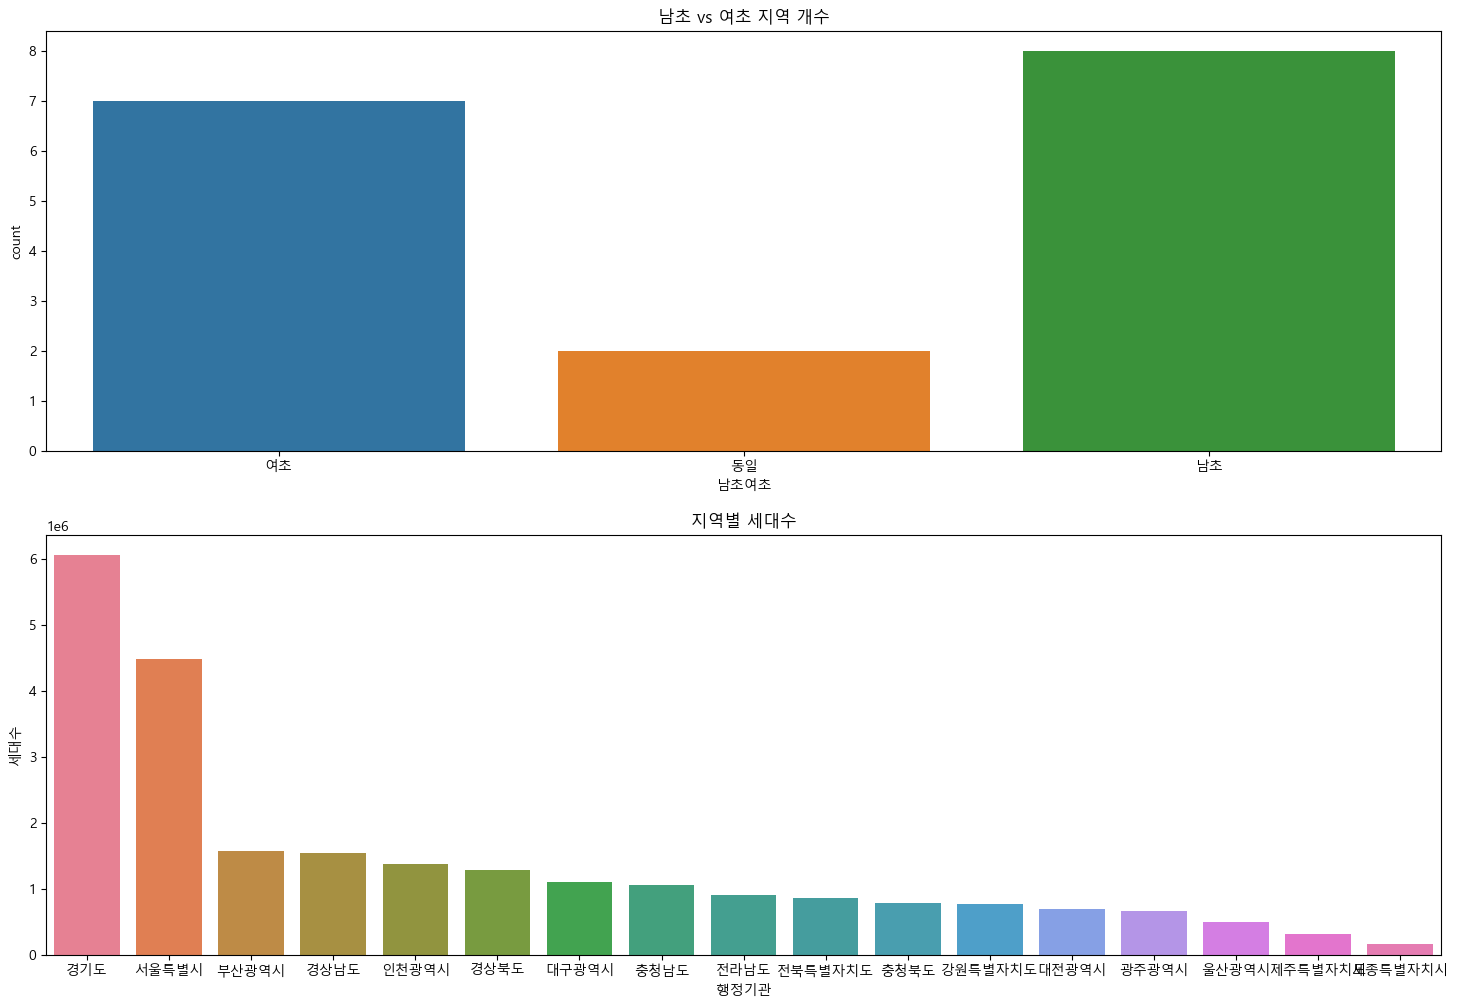

In [45]:
house_df = data.loc[data['행정기관'] != '전국', ['행정기관','세대수']].sort_values(by='세대수',ascending=False).reset_index(drop=True).copy()

figure,(axes4, axes5) = plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(18,12)

sns.countplot(data=ratio2_df,x='남초여초',order=['여초','동일','남초'], ax=axes4, hue='남초여초').set_title('남초 vs 여초 지역 개수')
sns.barplot(data=house_df.sort_values(by='세대수',ascending=False),x='행정기관',y='세대수',ax=axes5, hue='행정기관').set_title('지역별 세대수')

6. 남자 인구 vs 여자 인구 비교 Plot ( 선택 )

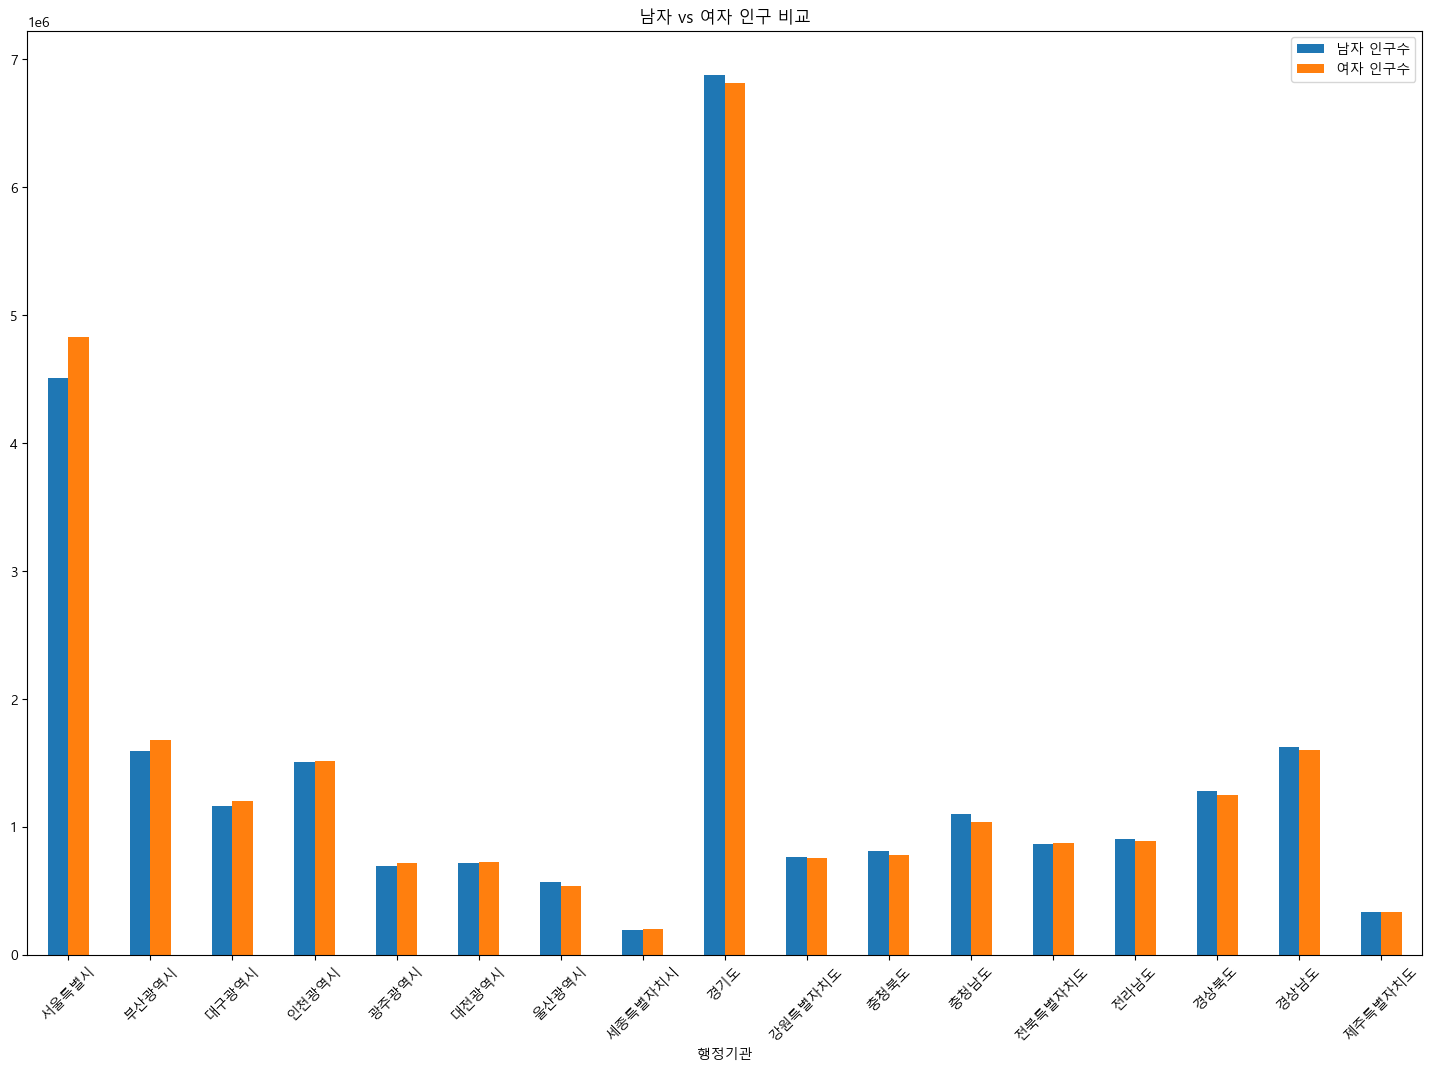

In [ ]:
man_woman_df = data.loc[data['행정기관']!='전국', ['행정기관','남자 인구수','여자 인구수']]

group_df = man_woman_df.groupby('행정기관',sort=False)[['남자 인구수','여자 인구수']].sum().copy()  # groupby 를 하면 자동으로 가나다순 정렬이 된다!

group_df.plot(kind='bar', figsize=(18,12))

plt.title('남자 vs 여자 인구 비교')
plt.xlabel('행정기관')
plt.xticks(rotation=45)
plt.show()